In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio

In [2]:
dir_path = r"C:\Users\dave\aiffel\EUANGGG\maincode\data\dataset\audioonly\labeled\original_dataset"
class_names = next(os.walk(dir_path))[1]
class_names

['belly_pain', 'discomfort', 'hungry', 'tired']

In [3]:
audio_path = [os.path.join(dir_path, name) for name in class_names]
audio_path

['C:\\Users\\dave\\aiffel\\EUANGGG\\maincode\\data\\dataset\\audioonly\\labeled\\original_dataset\\belly_pain',
 'C:\\Users\\dave\\aiffel\\EUANGGG\\maincode\\data\\dataset\\audioonly\\labeled\\original_dataset\\discomfort',
 'C:\\Users\\dave\\aiffel\\EUANGGG\\maincode\\data\\dataset\\audioonly\\labeled\\original_dataset\\hungry',
 'C:\\Users\\dave\\aiffel\\EUANGGG\\maincode\\data\\dataset\\audioonly\\labeled\\original_dataset\\tired']

In [4]:
bpain_audio = glob.glob(os.path.join(audio_path[0], '*.wav'))
discomf_audio = glob.glob(os.path.join(audio_path[1], '*.wav'))
hungry_audio = glob.glob(os.path.join(audio_path[2], '*.wav'))
tired_audio = glob.glob(os.path.join(audio_path[3], '*.wav'))

In [5]:
audio_num_byclass = {
    'bpain': len(bpain_audio),
    'discomf': len(discomf_audio),
    'hungry': len(hungry_audio),
    'tired': len(tired_audio)
}

for k, v in audio_num_byclass.items():
    print(f'num audio for the class {k}: {v}')

num audio for the class bpain: 16
num audio for the class discomf: 64
num audio for the class hungry: 410
num audio for the class tired: 24


## **Data Imbalance** 체크

<function matplotlib.pyplot.show(close=None, block=None)>

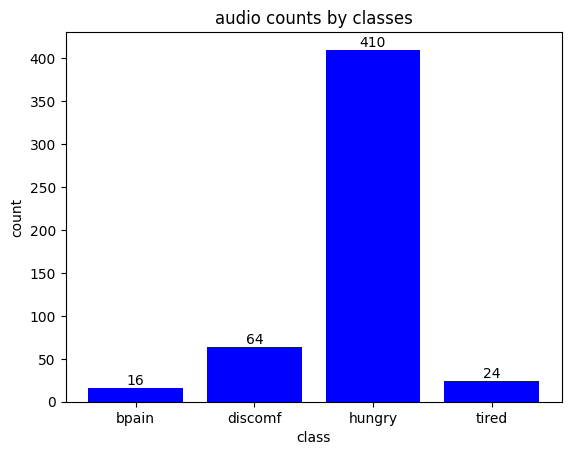

In [6]:
plt.bar(audio_num_byclass.keys(), audio_num_byclass.values(), color ='b')

for class_label, count in audio_num_byclass.items():
    plt.text(class_label, count, str(count), ha='center', va='bottom')

plt.xlabel('class')
plt.ylabel('count')
plt.title('audio counts by classes')
plt.show

## **클래스별 sample rate, pitch, duration 측정**

In [7]:
bpain_sr = [(librosa.load(audio, sr=None)[1]) for audio in bpain_audio]
discomf_sr = [(librosa.load(audio, sr=None)[1]) for audio in discomf_audio]
hungry_sr = [(librosa.load(audio, sr=None)[1]) for audio in hungry_audio]
tired_sr = [(librosa.load(audio, sr=None)[1]) for audio in tired_audio]

In [8]:
print(len(bpain_sr))
print(len(discomf_sr))
print(len(hungry_sr))
print(len(tired_sr))

16
64
410
24


(8000,) (16,)
(8000, 44100) (35, 29)
(8000, 44100) (382, 28)
(8000,) (24,)


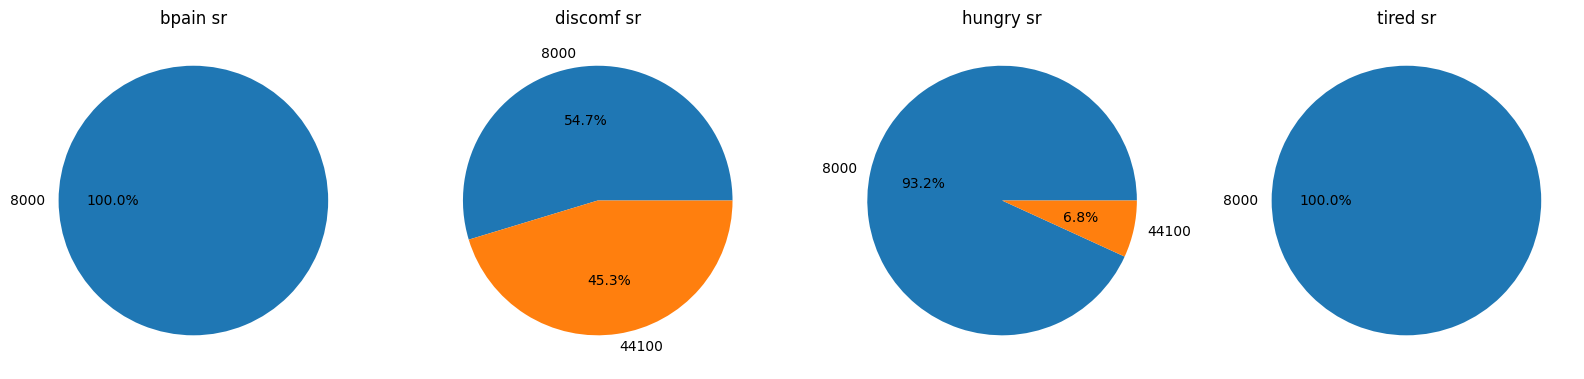

In [9]:
# Sample Rate 측정
from collections import Counter
audio_sr_byclass = {
    'bpain': bpain_sr,
    'discomf': discomf_sr,
    'hungry': hungry_sr,
    'tired': tired_sr
}

# Create a figure with 4 subplots
plt.figure(figsize=(20, 5))

for i, (k, v) in enumerate(audio_sr_byclass.items()):
    # Count the occurrences of each sample rate
    sr_counts = Counter(v)
    labels, counts = zip(*sr_counts.items())
    print(labels, counts)

    # Create a subplot for each class
    plt.subplot(1, 4, i+1)
    plt.pie(counts, labels=labels, autopct ='%.1f%%')
    plt.title(f'{k} sr')

plt.show()

In [10]:
# 클래스별 pitch 측정
bpain_pitch = []
discomf_pitch = []
hungry_pitch = []
tired_pitch = []

all_pitch = [bpain_pitch, discomf_pitch, hungry_pitch, tired_pitch]
all_path = [bpain_audio, discomf_audio, hungry_audio, tired_audio]

In [11]:
for cls, path in zip(all_pitch, all_path):
    for pth in path:
        pitches, magnitudes = librosa.piptrack(y=librosa.load(pth)[0], sr=44100)
        # Extracting the dominant pitch
        for t in range(pitches.shape[1]):
            index = magnitudes[:, t].argmax()
            pitch = pitches[index, t]
            if pitch:  # This check helps to avoid appending zero pitches
                cls.append(pitch)

In [12]:
bpain_pitch_arr = np.array(bpain_pitch)
discomf_pitch_arr = np.array(discomf_pitch)
hungry_pitch_arr = np.array(hungry_pitch)
tired_pitch_arr = np.array(tired_pitch)

In [13]:
bpain_pitch_arr.shape

(4782,)

In [14]:
discomf_pitch_arr.shape

(16973,)

In [15]:
df_pitch = pd.DataFrame({
    'bpain_pitch': pd.Series(bpain_pitch_arr),
    'discomf_pitch': pd.Series(discomf_pitch_arr),
    'hungry_pitch': pd.Series(hungry_pitch_arr),
    'tired_pitch': pd.Series(tired_pitch_arr)
})

In [16]:
df_pitch.describe()

,bpain_pitch,discomf_pitch,hungry_pitch,tired_pitch
count,4782.000000,16973.000000,119038.000000,7132.000000
mean,1355.034668,1550.644409,1357.211426,1389.066772
std,878.422180,1008.807739,951.313965,983.913635
min,140.294876,140.216385,139.972458,142.512436
25%,728.404419,619.969421,592.343903,680.004211
50%,1014.120728,1504.342651,1096.789001,1063.587646
75%,1767.302612,2291.602539,1868.113708,1871.646118
max,3993.204102,3993.292725,3994.302734,3993.643799


<function matplotlib.pyplot.show(close=None, block=None)>

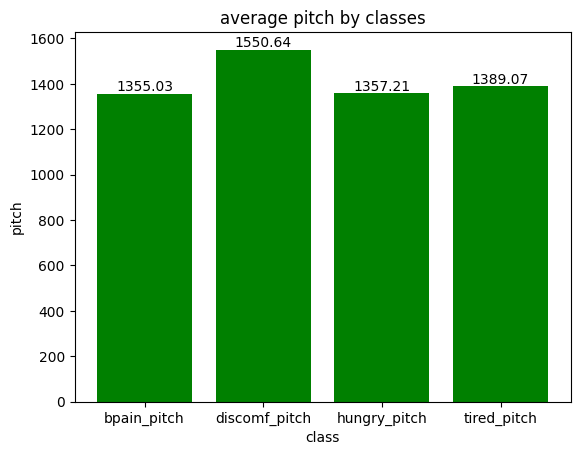

In [17]:
plt.bar(df_pitch.columns, df_pitch.describe().loc['mean', :], color ='g')

for index, mean_value in enumerate(df_pitch.describe().loc['mean', :]):
    plt.text(index, mean_value, f"{mean_value:.2f}", ha='center', va='bottom')

plt.xlabel('class')
plt.ylabel('pitch')
plt.title('average pitch by classes')
plt.show

In [18]:
bpain_dura = []
discomf_dura = []
hungry_dura = []
tired_dura = []

all_duration = [bpain_dura, discomf_dura, hungry_dura, tired_dura]

In [19]:
for dura, path in zip(all_duration, all_path):
    for pth in path:
        duration = librosa.get_duration(y=librosa.load(pth)[0], sr=44100)
        dura.append(duration)

In [20]:
bpain_dura_arr = np.array(bpain_dura)
discomf_dura_arr = np.array(discomf_dura)
hungry_dura_arr = np.array(hungry_dura)
tired_dura_arr = np.array(tired_dura)

In [21]:
df_dura = pd.DataFrame({
    'bpain_duration': pd.Series(bpain_dura_arr),
    'discomf_duration': pd.Series(discomf_dura_arr),
    'hungry_duration': pd.Series(hungry_dura_arr),
    'tired_duration': pd.Series(tired_dura_arr)
})

df_dura

,bpain_duration,discomf_duration,hungry_duration,tired_duration
0,3.43,3.5,3.470000,3.50
1,3.50,3.5,3.450000,3.34
2,3.50,3.5,3.480000,3.33
3,3.50,3.5,3.490000,3.26
4,3.50,3.5,3.500000,3.50
...,...,...,...,...
405,NaN,NaN,2.506667,NaN
406,NaN,NaN,2.506667,NaN
407,NaN,NaN,2.517347,NaN
408,NaN,NaN,2.506667,NaN


In [22]:
df_dura.describe()

,bpain_duration,discomf_duration,hungry_duration,tired_duration
count,16.000000,64.000000,410.000000,24.000000
mean,3.475625,3.105596,3.394254,3.453750
std,0.035771,0.469712,0.245557,0.066973
min,3.410000,2.496009,2.496009,3.260000
25%,3.445000,2.525340,3.430000,3.417500
50%,3.500000,3.375000,3.470000,3.500000
75%,3.500000,3.500000,3.500000,3.500000
max,3.500000,3.872018,3.530000,3.500000


<function matplotlib.pyplot.show(close=None, block=None)>

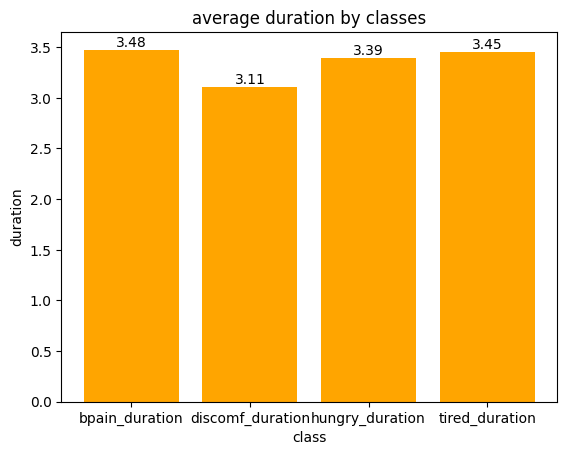

In [23]:
plt.bar(df_dura.columns, df_dura.describe().loc['mean', :], color ='orange')

for index, mean_value in enumerate(df_dura.describe().loc['mean', :]):
    plt.text(index, mean_value, f"{mean_value:.2f}", ha='center', va='bottom')

plt.xlabel('class')
plt.ylabel('duration')
plt.title('average duration by classes')
plt.show

## **FFT 기준 EDA**
- class 별 max peak와 peak들이 몇 개있는지 확인

In [24]:
from scipy.signal import find_peaks

def analyze_audio(audio_files):
    class_results = {}

    for class_name, files in audio_files.items():
        max_peaks = []
        num_peaks = []

        for file in files:
            # Load the audio file
            y, sr = librosa.load(file)

            # Apply FFT and get the magnitude spectrum
            fft = np.fft.fft(y)
            magnitude = np.abs(fft)

            # Find peaks
            peaks, _ = find_peaks(magnitude)

            # Calculate the max peak value and the number of peaks
            max_peak_val = np.max(magnitude[peaks]) if peaks.size > 0 else 0
            num_peak = len(peaks)

            max_peaks.append(max_peak_val)
            num_peaks.append(num_peak)

        # Calculate the mean of max peak values and mean number of peaks for the class
        mean_max_peak = np.mean(max_peaks) if max_peaks else 0
        mean_num_peak = np.mean(num_peaks) if num_peaks else 0

        class_results[class_name] = (mean_max_peak, mean_num_peak)

    return class_results

In [25]:
all_path_dict= {
    'bpain': bpain_audio, 
    'discomf': discomf_audio,
    'hungry': hungry_audio,
    'tired':tired_audio
}

peak_dict = analyze_audio(all_path_dict)
peak_dict

{'bpain': (464.9392248226189, 48661.8125),
 'discomf': (760.8447184616742, 43355.046875),
 'hungry': (674.7819339778825, 46187.634146341465),
 'tired': (512.4897018591779, 46466.333333333336)}

In [26]:
peak_dict.values()

dict_values([(464.9392248226189, 48661.8125), (760.8447184616742, 43355.046875), (674.7819339778825, 46187.634146341465), (512.4897018591779, 46466.333333333336)])

In [27]:
def peak_byclass(dict):
    peak_byclass_dict = {}
    for class_name, val in peak_dict.items():
        if isinstance(val, tuple):
            val = [val]
        max, mean_num = zip(*val)
        peak_byclass_dict[f'{class_name}_max_peak'] = max[0]
        peak_byclass_dict[f'{class_name}_meannum_peak'] = mean_num[0]

    return peak_byclass_dict

In [28]:
peak_descr_dict = peak_byclass(peak_dict)
peak_descr_dict

{'bpain_max_peak': 464.9392248226189,
 'bpain_meannum_peak': 48661.8125,
 'discomf_max_peak': 760.8447184616742,
 'discomf_meannum_peak': 43355.046875,
 'hungry_max_peak': 674.7819339778825,
 'hungry_meannum_peak': 46187.634146341465,
 'tired_max_peak': 512.4897018591779,
 'tired_meannum_peak': 46466.333333333336}

In [29]:
peak_df = pd.DataFrame([peak_descr_dict])
peak_df

,bpain_max_peak,bpain_meannum_peak,discomf_max_peak,discomf_meannum_peak,hungry_max_peak,hungry_meannum_peak,tired_max_peak,tired_meannum_peak
0,464.939225,48661.8125,760.844718,43355.046875,674.781934,46187.634146,512.489702,46466.333333


C:\Users\dave\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
C:\Users\dave\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\dave\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


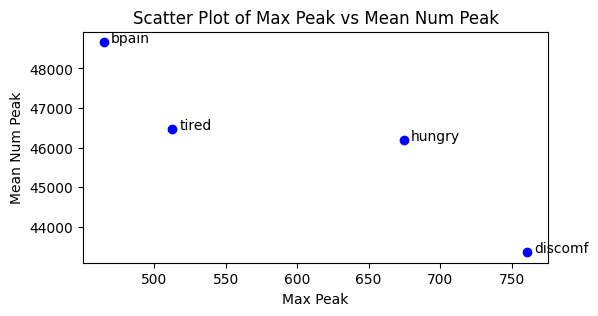

In [30]:
# Reshaping and organizing the data for plotting
categories = set(cat.rsplit('_', 2)[0] for cat in peak_df.keys())
max_peaks = [peak_df[f'{cat}_max_peak'] for cat in categories]
mean_nums = [peak_df[f'{cat}_meannum_peak'] for cat in categories]

# Creating the scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(max_peaks, mean_nums, color='blue')

# Adding labels and title
plt.title('Scatter Plot of Max Peak vs Mean Num Peak')
plt.xlabel('Max Peak')
plt.ylabel('Mean Num Peak')
for i, cat in enumerate(categories):
    plt.annotate(cat,
                 (max_peaks[i], mean_nums[i]),
                textcoords='offset points',
                xytext=(5,0),
                 ha='left')

# Showing the plot
plt.show()

## **PCA 로 outlier 찾기**

In [31]:
# temp = []
# for path in bpain_audio:
#     y, sr = librosa.load(path)
#     mfcc = librosa.feature.mfcc(y=y, sr=sr)
#     temp.append(mfcc)

In [32]:
# def pad_mfccs_with_average(mfccs, max_length):
#     padded_mfccs = []
#     for mfcc in mfccs:
#         # Calculate the average of the MFCC frames
#         avg_frame = np.mean(mfcc, axis=1).reshape(-1, 1)
        
#         # Calculate how much padding is needed
#         pad_width = max_length - mfcc.shape[1]
        
#         # Create padding with the average frame
#         padding = np.tile(avg_frame, (1, pad_width))
        
#         # Concatenate the original MFCCs with the padding
#         padded = np.concatenate((mfcc, padding), axis=1)
        
#         padded_mfccs.append(padded)
    
#     return np.array(padded_mfccs)

In [33]:
# max_length = max(mfcc.shape[1] for mfcc in temp)  # Find the maximum length
# padded_mfccs = pad_mfccs_with_average(temp, max_length)
# padded_mfccs.shape

In [34]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_mfcc = [scaler.fit_transform(mfcc) for mfcc in padded_mfccs]

In [35]:
# scaled_mfcc = np.array(scaled_mfcc)

In [36]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# import numpy as np

# pca = PCA(n_components=2)
# centroids = []

# # Calculate centroid of PCA-transformed data for each mfcc
# for mfcc in scaled_mfcc:
#     transformed_data = pca.fit_transform(mfcc)
#     centroid = np.mean(transformed_data, axis=0)
#     centroids.append(centroid)

# # Convert list of centroids to a NumPy array for easy manipulation
# centroids = np.array(centroids)

# # Plot the centroids of each transformed mfcc
# plt.scatter(centroids[:, 0], centroids[:, 1], label='Centroids of each MFCC')

# # Calculate and plot the overall centroid
# overall_centroid = np.mean(centroids, axis=0)
# plt.scatter(overall_centroid[0], overall_centroid[1], color='red', marker='x', label='Overall Centroid')
# plt.text(overall_centroid[0], overall_centroid[1], ' Overall Centroid', color='red')

# # Labeling the plot
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Centroids of PCA-transformed MFCCs')
# plt.legend()

# plt.show()

In [37]:
# # Assuming centroids and overall_centroid are already defined
# # Calculate distances from each centroid to the overall centroid
# distances = np.sqrt(np.sum((centroids - overall_centroid) ** 2, axis=1))

# # Calculate the mean of these distances
# mean_distance = np.mean(distances)

# # Classify centroids based on their distance to the overall centroid
# close_to_centroid = distances < mean_distance
# far_from_centroid = distances >= mean_distance

# # Plotting
# plt.scatter(centroids[close_to_centroid, 0], centroids[close_to_centroid, 1], color='green', label='Close to Centroid')
# plt.scatter(centroids[far_from_centroid, 0], centroids[far_from_centroid, 1], color='blue', label='Far from Centroid')
# plt.scatter(overall_centroid[0], overall_centroid[1], color='red', marker='x', label='Overall Centroid')

# # Labeling the plot
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Clustering based on Distance to Overall Centroid')
# plt.legend()
# plt.show()